# <u>Heart Disease Detection

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Data Collection and Processing

In [2]:
# loading dataset
heart_dataset = pd.read_csv("heart_disease_dataset.csv")

In [3]:
# showing dataset
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


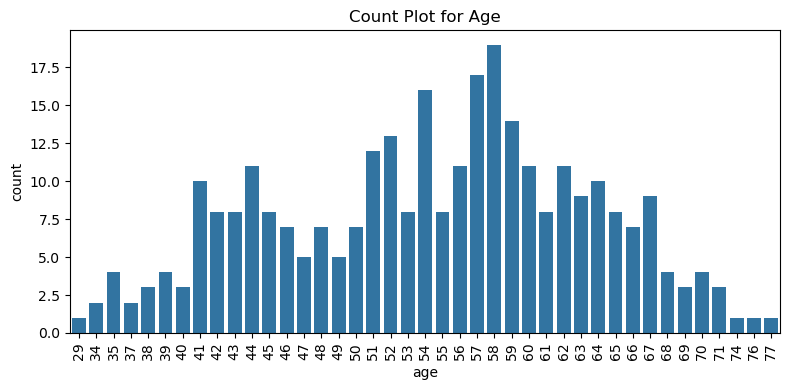

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(x=heart_dataset["age"])
plt.title("Count Plot for Age")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


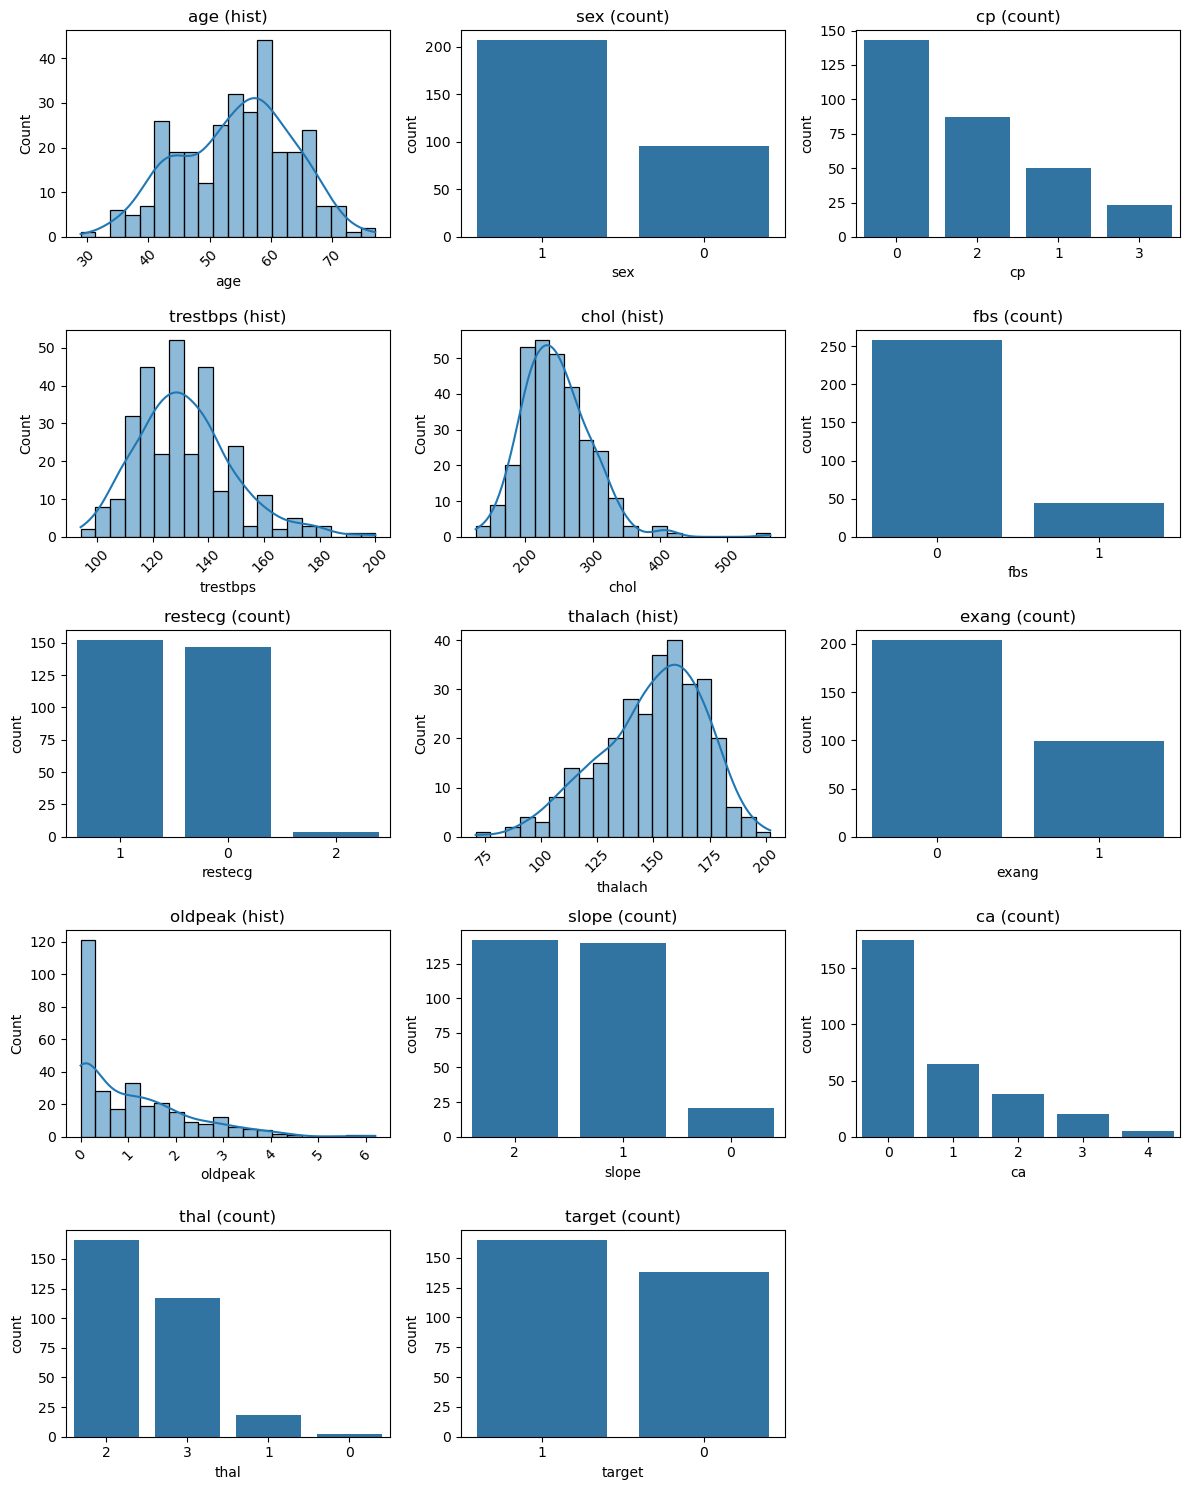

In [5]:
import math, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
df = heart_dataset.copy()
cols = df.columns.tolist(); n = len(cols); ncols = 3
nrows = math.ceil(n/ncols); fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3)); axs = axs.flatten()

for i,c in enumerate(cols):
    s = df[c].dropna(); ax = axs[i]
    if pd.api.types.is_numeric_dtype(s) and s.nunique()>15:
        sns.histplot(s, bins=20, kde=True, ax=ax); ax.set_title(f"{c} (hist)")
    else:
        sns.countplot(x=s, order=s.value_counts().index, ax=ax); ax.set_title(f"{c} (count)")
    if s.nunique()>6: ax.tick_params(axis='x', rotation=45)

for j in range(i+1, len(axs)): axs[j].axis('off')
plt.tight_layout(); plt.show()


In [6]:
# number of rows and columns
heart_dataset.shape

(303, 14)

In [7]:
# check missing values
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# showing dataset information
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# data distribution
heart_dataset["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [10]:
# statistical measures of dataset
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# correlation 
correlation = heart_dataset.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

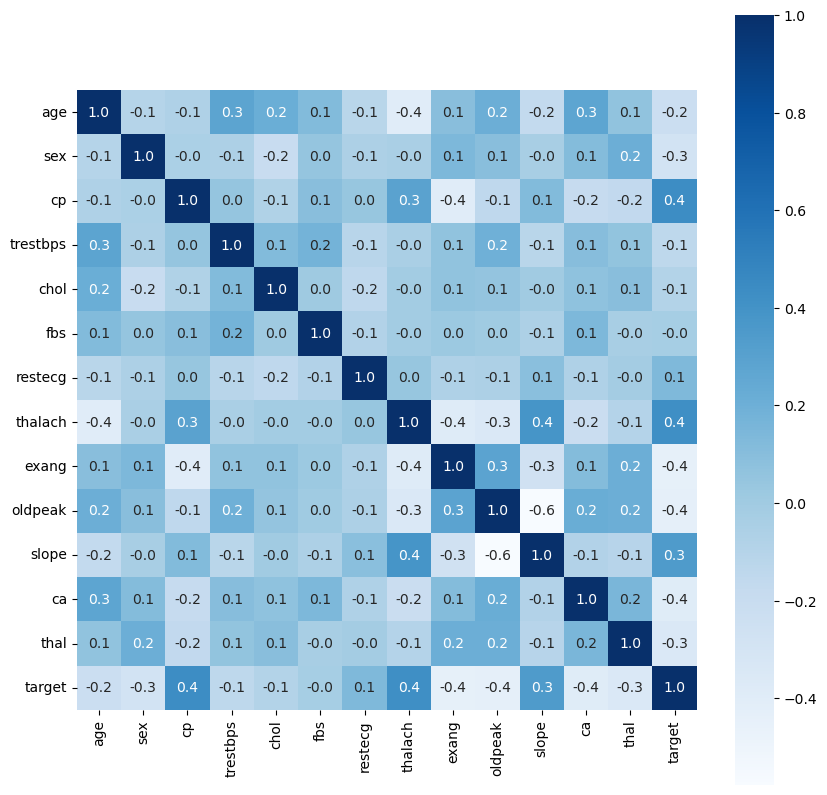

In [12]:
# visualise correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {"size": 10}, cmap = "Blues")

In [13]:
# separating features and target
X = heart_dataset.drop(["target"], axis = 1)
Y = heart_dataset["target"]

In [14]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

### Split Train and Test data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [16]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (303, 13)
Train data:  (242, 13)
Test data:  (61, 13)


In [17]:
print(X_train)
print(Y_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
61    54    1   1       108   309    0        1      156      0      0.0   
238   77    1   0       125   304    0        0      162      1      0.0   
160   56    1   1       120   240    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
289   55    0   0       128   205    0        2      130      1      2.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
100   42    1   3       148   244    0        0      178      0      0.8   
49    53    0   0       138   234    0        0      160      0      0.0   
300   68    1   0       144   193    1        1      141      0      3.4   
194   60    1   2       140   185    0        0      155      0      3.0   
131   49    0   1       134   271    0        1      162      0      0.0   

     slope  ca  thal  
61       2   0     3  
238      2   3     2  
160      0   0    

### Model Training using Logistic Regression

In [18]:
model = LogisticRegression(max_iter = 1000)

In [19]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

In [20]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.8553719008264463


In [21]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on training data: ", test_data_accuracy)

Accuracy on training data:  0.8032786885245902


### Predictive System

In [22]:
# taking a sample value for test
X_test.iloc[18].values

array([ 39. ,   1. ,   0. , 118. , 219. ,   0. ,   1. , 140. ,   0. ,
         1.2,   1. ,   0. ,   3. ])

In [23]:
def check_heart_disease(sample_index):
    # get input data
    input_data = X_test.iloc[sample_index].values

    # reshape for single prediction
    input_data_reshaped = input_data.reshape(1, -1)

    # make prediction
    prediction = model.predict(input_data_reshaped)

    # actual label (for verification)
    actual_label = Y_test.iloc[sample_index]

    # output
    print(f"Sample Index: {sample_index}")
    print(f"Actual Label: {actual_label}")

    if prediction[0] == 0:
        print("Diagnosis shows NO Heart Disease")
    else:
        print("Diagnosis detects Heart Disease")

## Checking the result

In [24]:
check_heart_disease(1)

Sample Index: 1
Actual Label: 1
Diagnosis detects Heart Disease


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
check_heart_disease(18)

Sample Index: 18
Actual Label: 0
Diagnosis shows NO Heart Disease


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
check_heart_disease(32)

Sample Index: 32
Actual Label: 1
Diagnosis detects Heart Disease


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
check_heart_disease(50)

Sample Index: 50
Actual Label: 0
Diagnosis shows NO Heart Disease


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
